In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/college_financials.csv', header=0)

In [7]:
yr4 = df.query('sector in (1,2,3)')
len(yr4)

34233

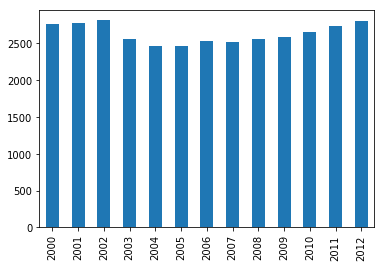

In [12]:
pd.value_counts(yr4['academic_year']).sort_index().plot.bar()

In [29]:
yr4['namecity'] = yr4['inst_name'] + yr4['city'] + yr4['state']
schoolrecords = pd.value_counts(yr4['namecity'])

C:\Users\yunlin\Miniconda3\envs\py3k\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


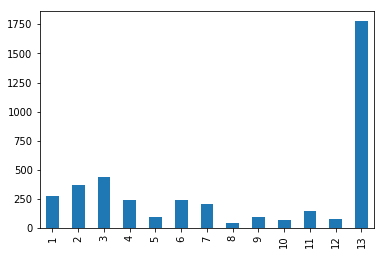

In [36]:
pd.value_counts(schoolrecords).sort_index().plot.bar()

In [39]:
joined = yr4.join(schoolrecords, on='namecity', lsuffix='yr4', rsuffix='cnt')

In [50]:
final_df = joined[joined['namecitycnt'] == 13].drop('namecitycnt', axis=1)

In [61]:
final_df.to_csv('data/college_financials_only4yr_only13.csv')

In [55]:
for c in final_df.columns:
    if final_df[c].dtype in (object, np.int64):
        print('skipping {}'.format(c))
        continue
    final_df['{}_prev'.format(c)] = final_df[c].shift(1)
    final_df['{}_change'.format(c)] = (final_df[c] - final_df['{}_prev'.format(c)]) / final_df['{}_prev'.format(c)]

skipping academic_year
skipping inst_name
skipping tcs_name
skipping city
skipping state
skipping zipcode
skipping sector
skipping namecityyr4


skipping academic_year
skipping inst_name
skipping tcs_name
skipping city
skipping state
skipping zipcode
skipping sector


C:\Users\yunlin\Miniconda3\envs\py3k\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


skipping namecityyr4


KeyError: 'cpi_index_change_prev'

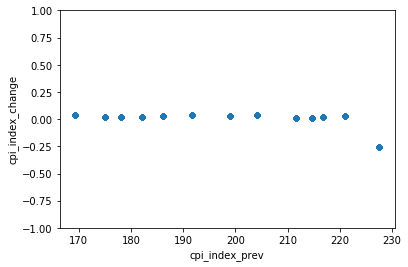

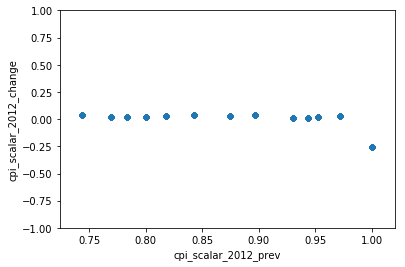

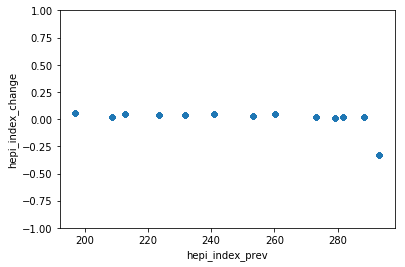

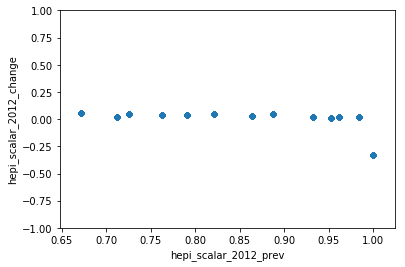

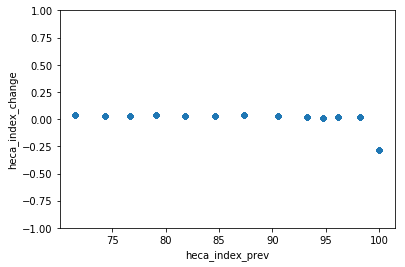

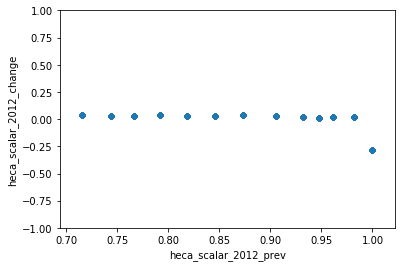

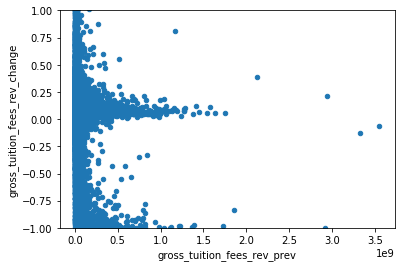

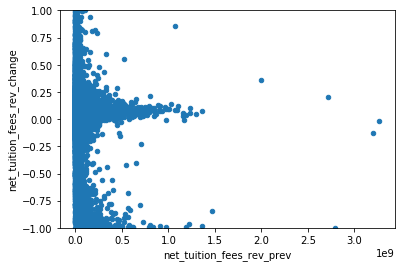

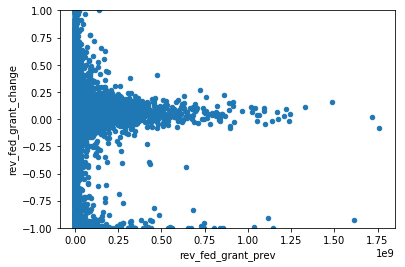

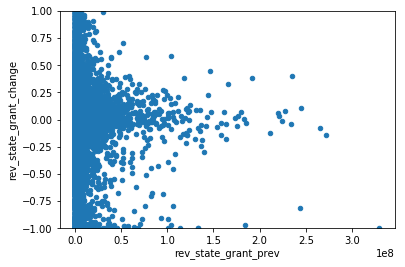

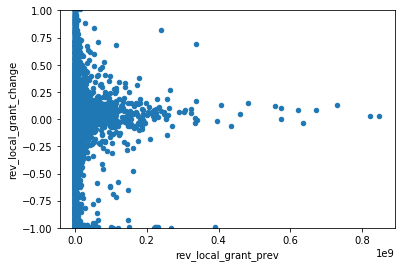

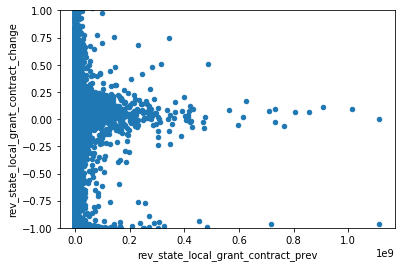

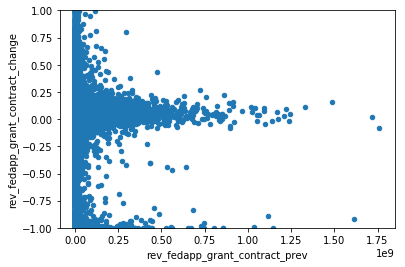

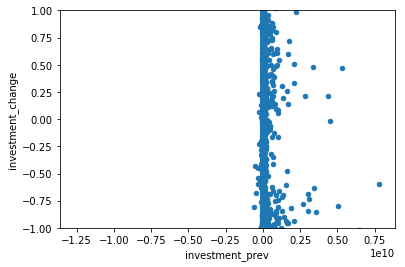

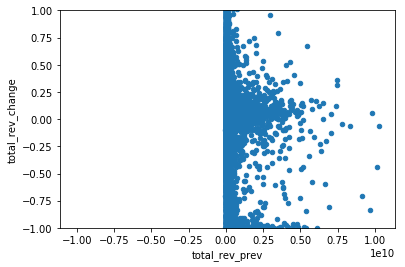

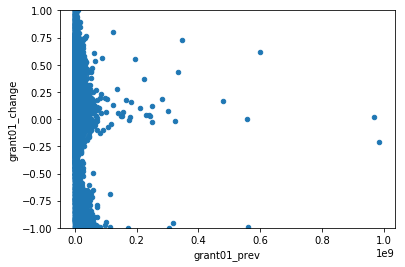

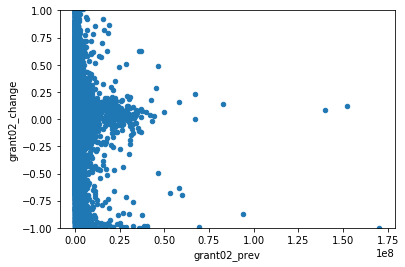

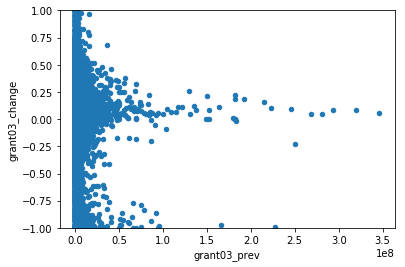

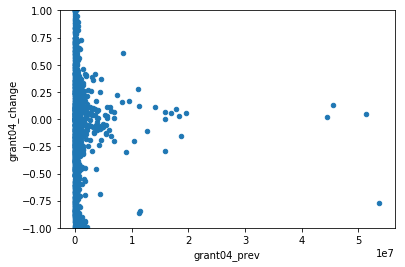

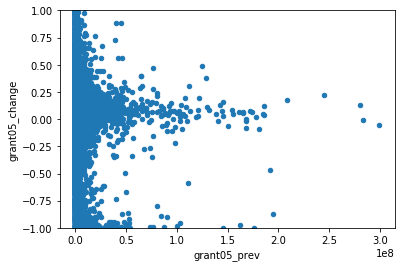

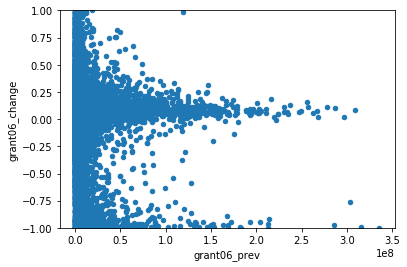

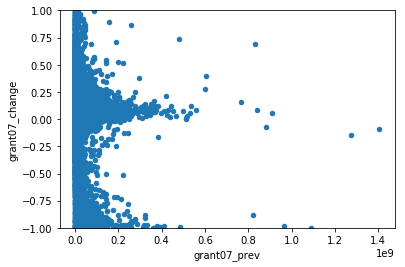

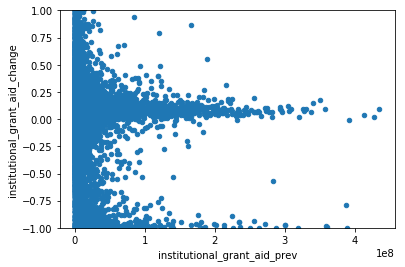

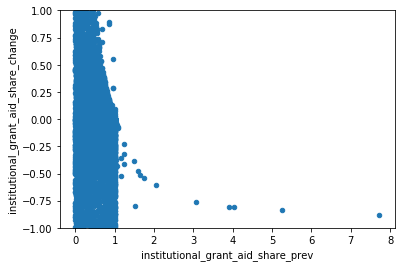

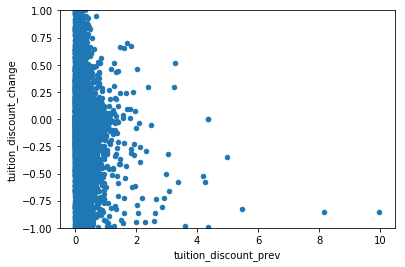

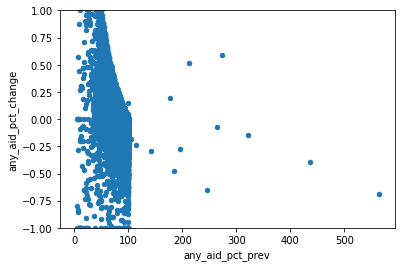

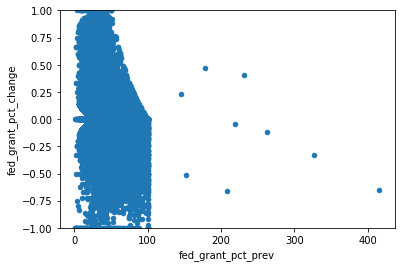

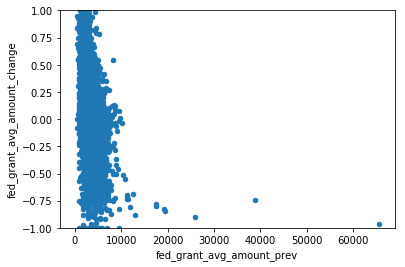

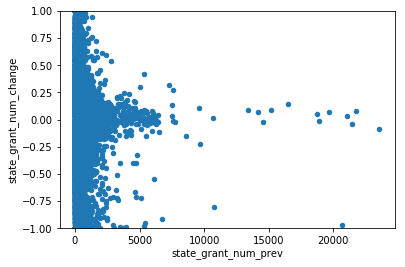

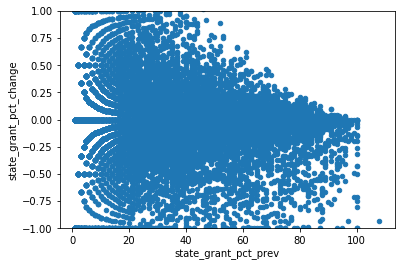

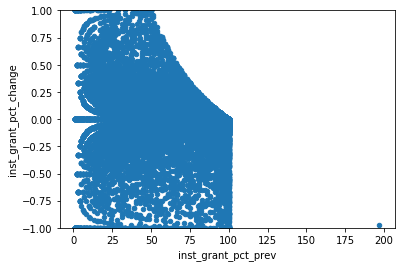

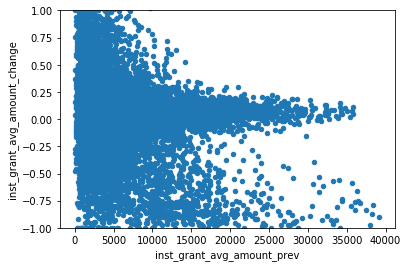

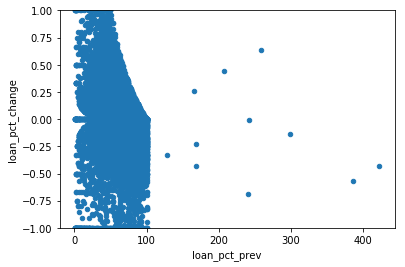

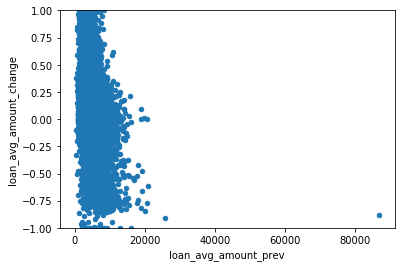

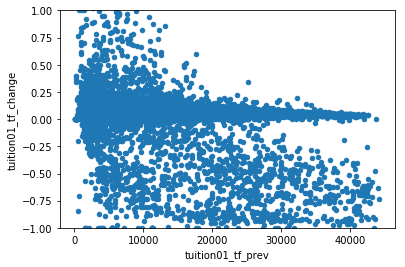

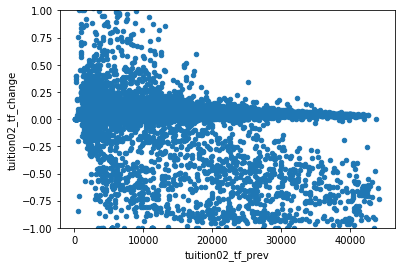

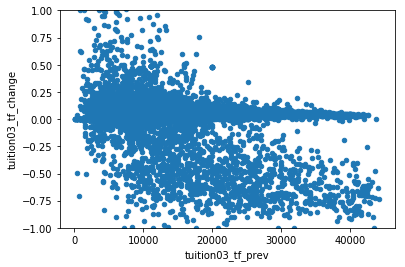

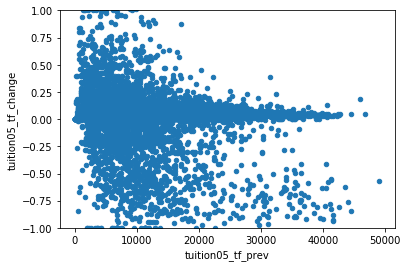

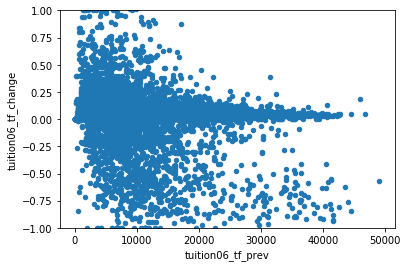

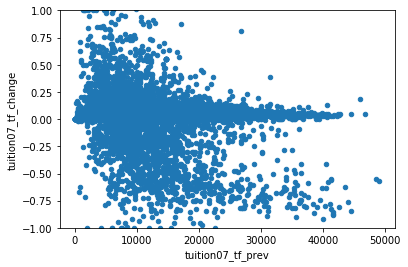

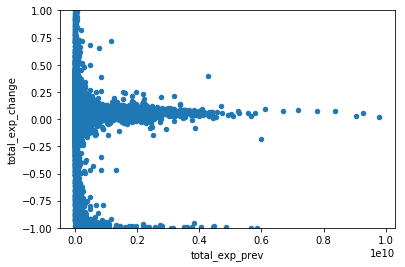

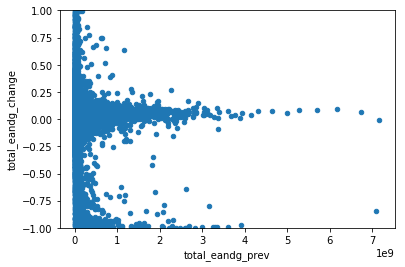

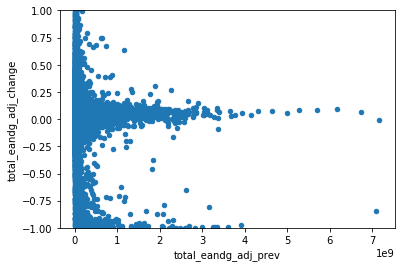

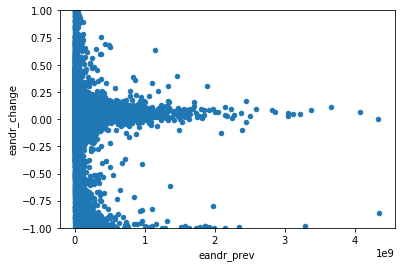

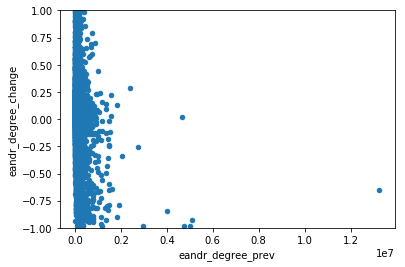

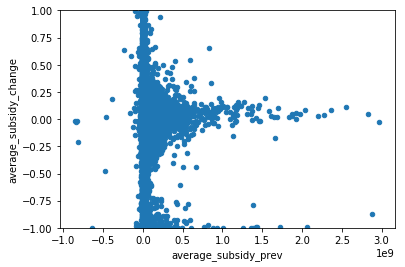

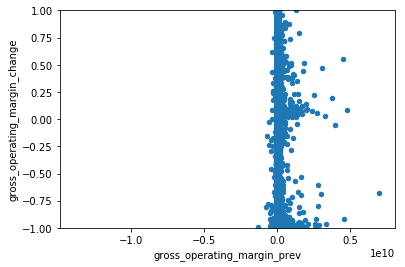

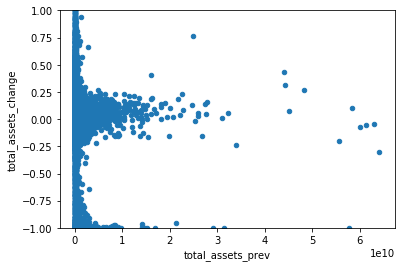

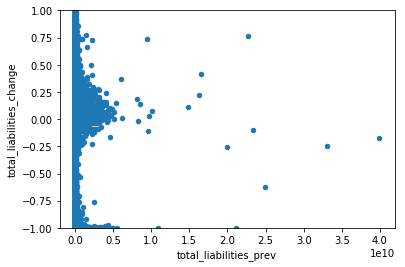

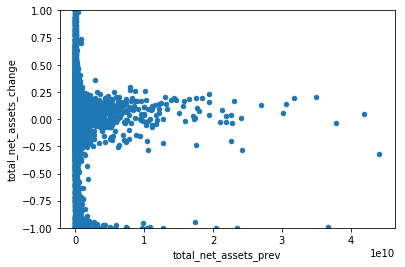

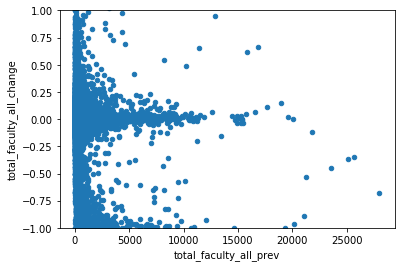

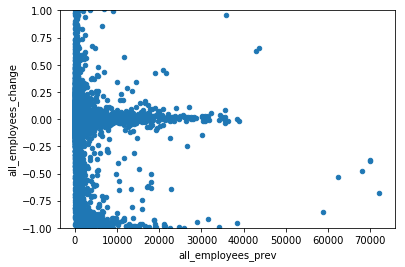

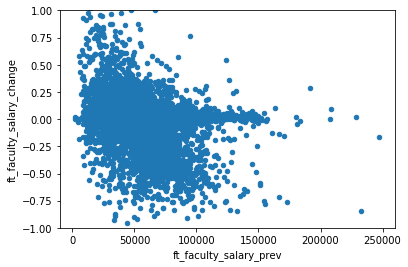

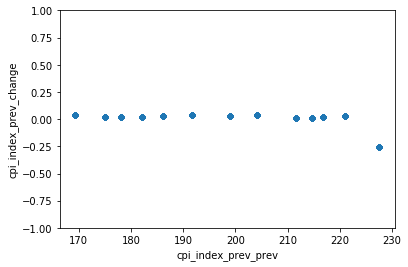

In [65]:
for c in final_df.columns:
    if final_df[c].dtype in (object, np.int64):
        print('skipping {}'.format(c))
        continue
    plt.figure()
    ax = final_df.plot.scatter('{}_prev'.format(c), '{}_change'.format(c))
    ax.set_ylim([-1,1])